## QTL Expecto Analysis

**Created**: 7 June 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Load Data

In [34]:
vcf <- fread("~/gains_team282/nikhil/data/Expecto/a3685cc7-0fa1-4c10-8aeb-f9f7cffffe7e_qtl_hg19.vcf") %>%
    as.data.frame()

colnames(vcf) <- c("chr", "pos", "snp", "ref", "alt")

In [42]:
expecto <- fread("~/gains_team282/nikhil/data/Expecto/a3685cc7-0fa1-4c10-8aeb-f9f7cffffe7e_feature_expecto.tsv") %>%
    as.data.frame() %>%
    dplyr::select(chrom=1, everything()) %>%
    merge(vcf, ., by.x=c("chr", "pos"), by.y=c("chrom", "position"))

In [44]:
head(expecto)

,chr,pos,snp,ref,alt,ref_allele,alt_allele,gene,Adipose Subcutaneous,Adipose Visceral Omentum,⋯,Temporal Lobe,Thoracic Aorta Endothelial Cell,Thyroid | ENCODE,Tongue,Tracheal Epithelial Cell,Umbilical Cord,Urinary Bladder,Uterine Smooth Muscle Cell,Uterus | ENCODE,Vein Endothelial Cell
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1,100224606,rs1856404,C,G,C,G,FRRS1,-0.0053164959,-0.0061457157,⋯,-0.0132591724,-1.091862e-02,-0.0035233498,-0.0108458996,-0.0188245773,-0.0103046894,-0.0117738247,-0.0135203600,-0.0136202574,-0.0105422735
2,chr1,100427842,rs6667554,G,C,G,C,SLC35A3,0.0003256798,0.0003324747,⋯,0.0002754927,2.343655e-04,0.0003899336,0.0003474951,0.0005524158,0.0004670620,0.0004462004,0.0004855394,0.0001429319,0.0003037453
3,chr1,100644888,rs17122019,G,A,G,A,LRRC39,-0.0213813782,-0.0229520798,⋯,-0.0135490894,-1.073885e-02,-0.0198827982,-0.0164791346,-0.0140150785,-0.0101581812,-0.0168492794,-0.0102800131,-0.0159051418,-0.0093977451
4,chr1,10077493,rs112151087,C,T,C,T,UBE4B,0.0005069971,0.0005216599,⋯,0.0009940863,8.099079e-04,0.0008097887,0.0008544922,0.0011070967,0.0008628368,0.0007957220,0.0009953976,0.0007995367,0.0008517504
5,chr1,10086392,rs9661116,G,A,G,A,UBE4B,0.0055696964,0.0057829618,⋯,0.0025037527,2.992153e-05,0.0043517351,0.0017019510,0.0015496016,0.0015032291,0.0029664040,0.0012407303,0.0040307045,0.0009251833
6,chr1,101373328,rs12040671,A,G,A,G,SLC30A7,0.0022004843,0.0019416809,⋯,0.0052421093,5.744457e-03,0.0027155876,0.0035191774,0.0043978691,0.0033696890,0.0032068491,0.0042198896,0.0040071011,0.0057927370


In [54]:
gene.info <- read.table("/nfs/team282/data/gains_team282/gene_info_864_20412_hla.txt") %>%
    dplyr::select(gene_id, gene_name)

In [55]:
cis.eqtl <- read.table("~/gains_team282/eqtl/cisresults/eigenMT/ciseqtl_eigenMT_corrected.txt") %>%
    dplyr::filter(Sig) %>%
    merge(gene.info, ., by.x="gene_id", by.y="gene")

In [56]:
head(cis.eqtl)

,gene_id,gene_name,snps,statistic,pvalue,beta,se,chr,SNPpos,TSS,BF,TESTS,BF.FDR,Sig,threshold
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<lgl>,<dbl>
1,ENSG00000000457,SCYL3,rs10753794,7.037066,5.192595e-12,0.04985873,0.007085159,1,169776143,169894267,3.608853e-09,695,1.308708e-08,TRUE,3.879445e-05
2,ENSG00000000460,C1orf112,rs12410806,-5.942351,5.426681e-09,-0.07212698,0.012137784,1,169749095,169662007,4.032024e-06,743,1.160666e-05,TRUE,3.628822e-05
3,ENSG00000000971,CFH,rs12406047,4.511592,7.515235e-06,0.17135374,0.037980769,1,196708768,196652043,2.818213e-03,375,6.073985e-03,TRUE,7.189906e-05
4,ENSG00000001036,FUCA2,rs2496591,5.771056,1.272071e-08,0.05556388,0.009628027,6,143416006,143511720,1.017657e-05,800,2.830516e-05,TRUE,3.370268e-05
5,ENSG00000001167,NFYA,rs72856259,7.552123,1.978551e-13,0.11980933,0.015864325,6,41100761,41072945,1.889516e-10,955,7.447584e-10,TRUE,2.823261e-05
6,ENSG00000001460,STPG1,rs6687210,5.266595,1.949343e-07,0.09241162,0.017546749,1,24405200,24416934,9.668744e-05,496,2.450046e-04,TRUE,5.435916e-05


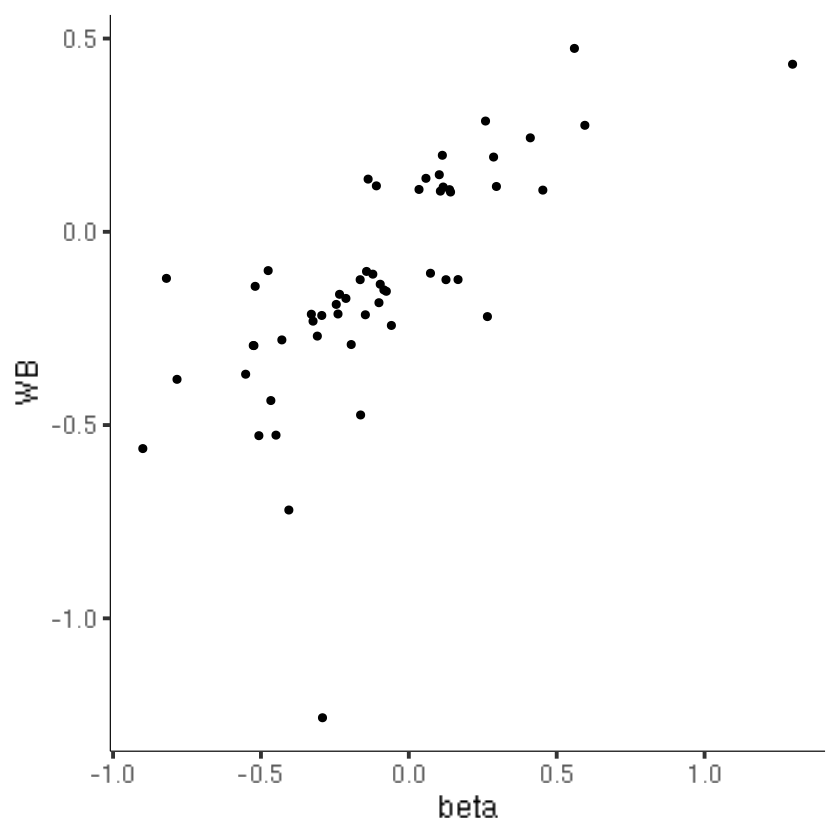

In [80]:
merge(cis.eqtl, expecto, by.x=c("snps", "gene_name"), by.y=c("snp", "gene")) %>%
    dplyr::select(gene_name, beta, `Whole Blood`) %>%
    dplyr::arrange(desc(abs(`Whole Blood`))) %>%
    dplyr::mutate(WB = `Whole Blood`) %>%
    dplyr::filter(abs(WB) > 0.1) %>%
    ggplot() +
    geom_point(aes(x=beta, y=WB)) +
    ggplot_theme